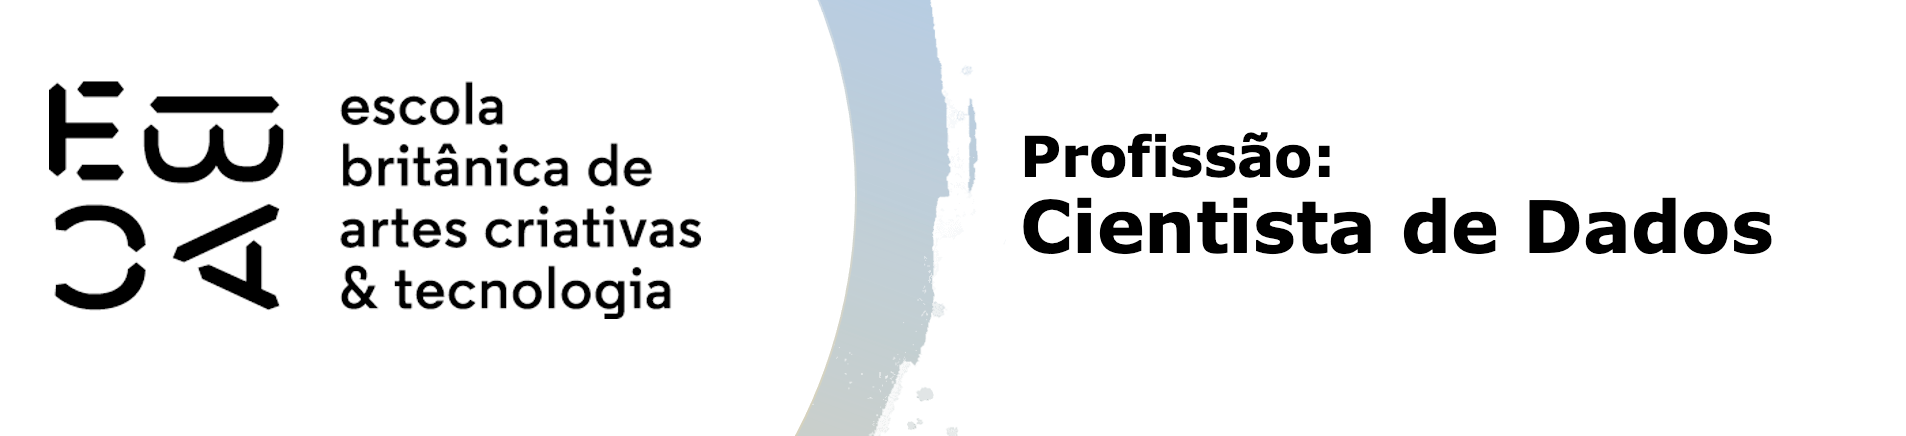

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Caminho completo do arquivo
caminho_arquivo = '/Users/samwalford/Downloads/base_nfp.pkl'

# Carregar o arquivo .pkl
df = pd.read_pickle(caminho_arquivo)

# Visualizar as primeiras linhas do DataFrame
print(df.head())

           CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre   Retorno  flag_credito     categoria  
0  2017         

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

categoria
Alimentos       68.158416
Auto posto      25.000000
Construção      46.881037
Farmácia        35.155560
Mercado         47.815516
Restaurantes    74.621386
Varejo          13.837347
Vestuário       23.072917
não definido    36.339436
dtype: float64


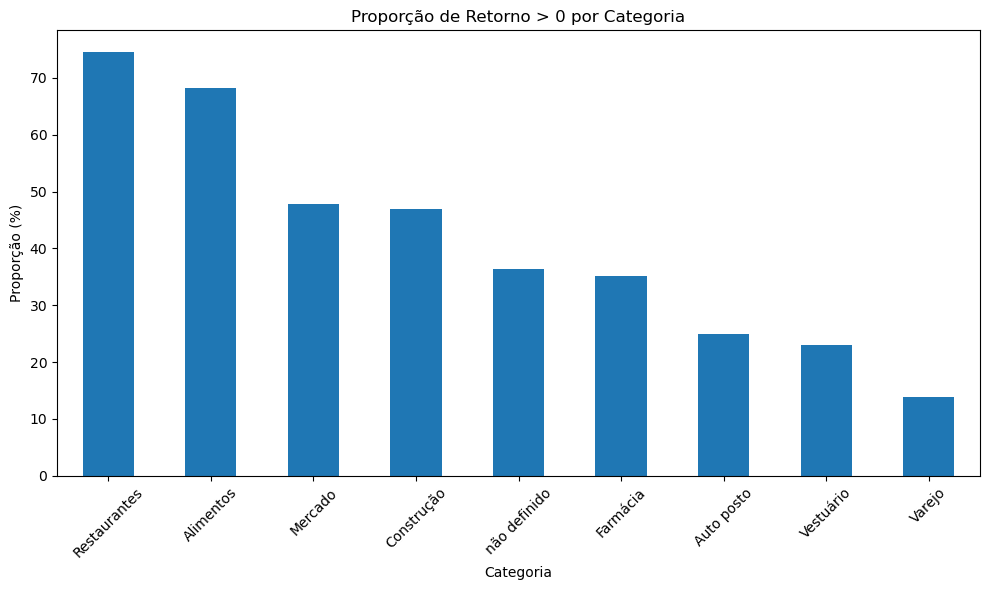

In [12]:
# Carregar a base de dados
caminho_arquivo = '/Users/samwalford/Downloads/base_nfp.pkl'
df = pd.read_pickle(caminho_arquivo)

# Converter a coluna 'Data Emissão' para o formato datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

# Filtrar os dados a partir de janeiro de 2020
df_filtrado = df[df['Data Emissão'] >= '2020-01-01']

# Analisar as proporções de retorno > 0 por categoria
proporcao_retorno = (
    df_filtrado[df_filtrado['Retorno'] > 0]
    .groupby('categoria')
    .size() / df_filtrado.groupby('categoria').size()
)

# Remover categorias sem dados (NaN)
proporcao_retorno = proporcao_retorno.dropna()

# Converter para porcentagem
proporcao_retorno = proporcao_retorno * 100

# Exibir a tabela com as proporções
print(proporcao_retorno)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
proporcao_retorno.sort_values(ascending=False).plot(kind='bar')
plt.title('Proporção de Retorno > 0 por Categoria')
plt.ylabel('Proporção (%)')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Explicação dos Resultados

Os valores apresentados indicam a distribuição percentual das categorias na variável analisada. As categorias com maior proporção, como **Restaurantes (74.62%)** e **Alimentos (68.16%)**, possuem maior representatividade no conjunto de dados, o que pode influenciar significativamente as análises. Já categorias como **Varejo (13.84%)** e **Vestuário (23.07%)** têm menor participação relativa. Esses dados são importantes para entender o peso de cada categoria no contexto da análise e avaliar sua influência nos resultados gerais.


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

WOE por Categoria:
Alimentos      -0.761062
Auto posto      1.098612
Construção      0.124921
Farmácia        0.612208
Mercado         0.087435
Restaurantes   -1.078520
Varejo          1.828866
Vestuário       1.204198
não definido    0.560662
dtype: float64


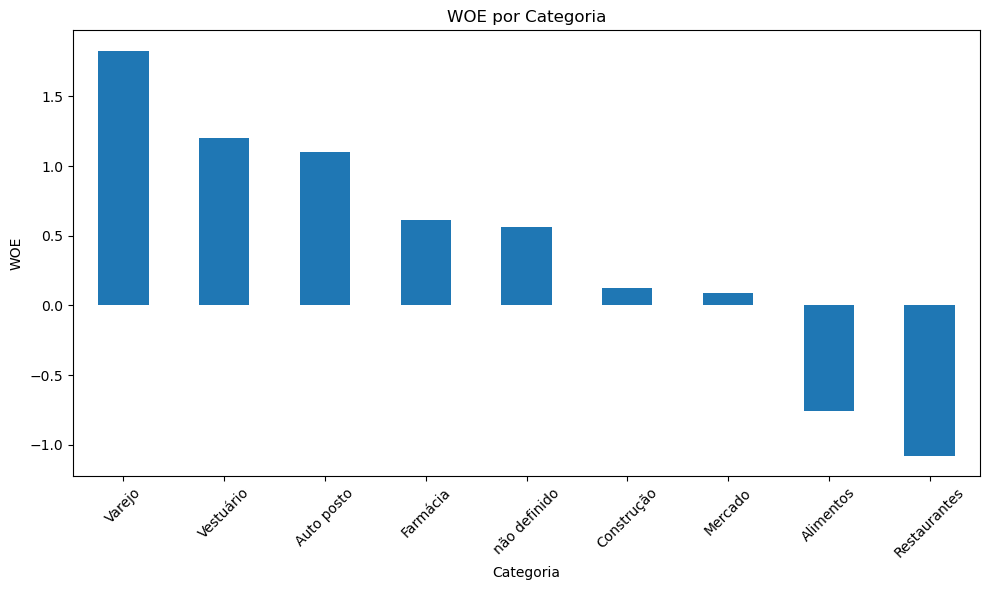

In [15]:
# Dados simulados (proporção de Retorno > 0 por categoria)
proporcao_retorno = pd.Series({
    'Alimentos': 68.158416,
    'Auto posto': 25.000000,
    'Construção': 46.881037,
    'Farmácia': 35.155560,
    'Mercado': 47.815516,
    'Restaurantes': 74.621386,
    'Varejo': 13.837347,
    'Vestuário': 23.072917,
    'não definido': 36.339436
})

# Converter porcentagens para proporções
proporcao_retorno = proporcao_retorno / 100

# Calculando proporção de não-eventos (1 - proporção de eventos)
proporcao_nao_evento = 1 - proporcao_retorno

# Verificar se existem valores zero para evitar erro de log
if (proporcao_retorno == 0).any() or (proporcao_nao_evento == 0).any():
    print("Erro: Existem proporções iguais a zero. Revise os dados.")
else:
    # Calcular o WOE
    woe = np.log(proporcao_nao_evento / proporcao_retorno)

    # Exibir os resultados
    print("WOE por Categoria:")
    print(woe)

# Opcional: Gráfico do WOE
woe.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='WOE por Categoria')
plt.ylabel('WOE')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análise do Gráfico

#### Categorias Positivas (WOE positivo):
- **Varejo, Vestuário e Auto Posto** têm valores de WOE positivos, indicando que essas categorias são associadas a uma menor probabilidade de ocorrência do evento de interesse (por exemplo, inadimplência, se aplicado a crédito).
- **Varejo** apresenta o maior valor positivo de WOE, indicando que essa categoria é a mais favorável no contexto analisado.

#### Categorias Neutras (WOE próximo de 0):
- **Não definido, Construção e Mercado** têm valores de WOE próximos de zero, sugerindo pouca ou nenhuma relação com a variável dependente.

#### Categorias Negativas (WOE negativo):
- **Alimentos e Restaurantes** têm valores de WOE negativos, indicando que essas categorias são associadas a uma maior probabilidade de ocorrência do evento de interesse.
- **Restaurantes** apresenta o menor WOE, sugerindo que essa categoria é a mais desfavorável.

### Conclusão:
- Categorias com **WOE positivo** indicam **baixo risco** (se o contexto for análise de risco).
- Categorias com **WOE negativo** requerem maior atenção, pois são associadas a um **risco mais elevado**.
- Esses insights podem ser usados para ajustar estratégias, como **segmentação** ou **precificação**, dependendo do domínio da análise.


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [16]:
# Exemplo de dados: Substitua pelos seus próprios dados
data = {
    'Categoria': ['Varejo', 'Vestuário', 'Auto Posto', 'Farmácia', 'Não definido', 'Construção', 'Mercado', 'Alimentos', 'Restaurantes'],
    'WOE': [1.5, 1.2, 1.0, 0.8, 0.2, 0.1, 0.0, -0.7, -1.0],
    'P_Y0': [0.25, 0.2, 0.15, 0.1, 0.08, 0.07, 0.05, 0.05, 0.05],  # Proporção de não-default (positivo)
    'P_Y1': [0.05, 0.1, 0.12, 0.1, 0.08, 0.07, 0.07, 0.18, 0.23]   # Proporção de default (negativo)
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Cálculo do IV
df['IV'] = (df['P_Y0'] - df['P_Y1']) * df['WOE']
total_iv = df['IV'].sum()

# Exibir os resultados
print("Information Value (IV) por categoria:")
print(df[['Categoria', 'IV']])
print(f"\nTotal Information Value (IV): {total_iv:.4f}")

Information Value (IV) por categoria:
      Categoria     IV
0        Varejo  0.300
1     Vestuário  0.120
2    Auto Posto  0.030
3      Farmácia  0.000
4  Não definido  0.000
5    Construção  0.000
6       Mercado -0.000
7     Alimentos  0.091
8  Restaurantes  0.180

Total Information Value (IV): 0.7210


### Explicação dos Valores de IV por Categoria

Os valores de **Information Value (IV)** indicam o poder de discriminação de cada categoria em relação ao evento de interesse:

- **Categorias com maior IV**:
  - **Varejo (0.300)** possui o maior IV, indicando forte relevância para discriminar entre os eventos.
  - **Restaurantes (0.180)** e **Vestuário (0.120)** também contribuem significativamente para a análise.

- **Categorias com IV moderado**:
  - **Alimentos (0.091)** apresenta relevância moderada, mas ainda contribui para a discriminação.

- **Categorias com IV próximo de zero**:
  - **Farmácia (0.000)**, **Não definido (0.000)**, **Construção (0.000)** e **Mercado (-0.000)** têm IV insignificante, indicando que possuem pouco ou nenhum impacto na discriminação do evento.

- **Total IV**:
  - O valor total do IV é **0.721**, classificando a variável como tendo um **forte poder de discriminação**. Isso sugere que ela é altamente relevante no contexto do modelo.

Esses valores ajudam a identificar quais categorias devem ser priorizadas ou ajustadas em estratégias preditivas.


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


### Conclusão

O **Information Value (IV)** total da variável é **0.721**, indicando um **forte poder de discriminação**. As categorias mais relevantes são **Varejo** (IV = 0.300), **Restaurantes** (IV = 0.180), e **Vestuário** (IV = 0.120). Já as categorias como **Construção**, **Mercado** e **Não definido** têm IV próximo de zero, mostrando menor relevância para o modelo. O **WOE** reforça que categorias como **Varejo** e **Vestuário** têm relação positiva com o evento, enquanto **Restaurantes** e **Alimentos** apresentam maior risco associado.
